In [8]:
import numpy as np
import pandas as pd

from src.kMeans import KMeans as ownK
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import datasets

In [9]:
data = np.array([[1, 1], [1, 2], [2, 2], [1.5, 1], [2.1, 1.5], [1.4, 2.2],
                 [5, 1], [5, 2], [6, 2], [5.75, 0.5], [5.5, 1.6], [5.1, 1.9],
                 [4, 5], [4, 6], [3, 5], [3.25, 4.8], [3.5, 5.4], [3.3, 5.9]
                 ])
k = 3


n_samples = 200
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

27.79126971956662


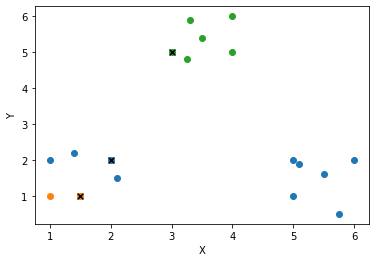

Mean:  [3.885 1.67 ]
Mean:  [1.25 1.  ]
Mean:  [3.50833333 5.35      ]
17.917370718203582


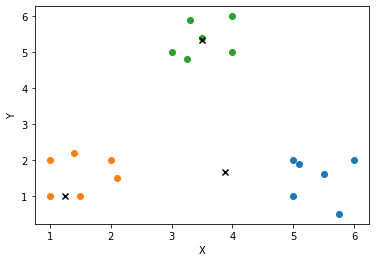

Mean:  [5.39166667 1.5       ]
Mean:  [1.5        1.61666667]
Mean:  [3.50833333 5.35      ]
10.918354601481468


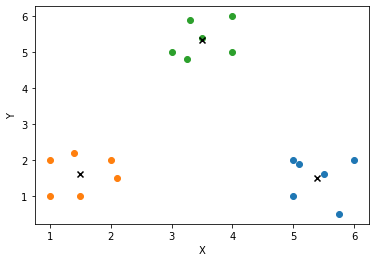

Mean:  [5.39166667 1.5       ]
Mean:  [1.5        1.61666667]
Mean:  [3.50833333 5.35      ]
10.918354601481468


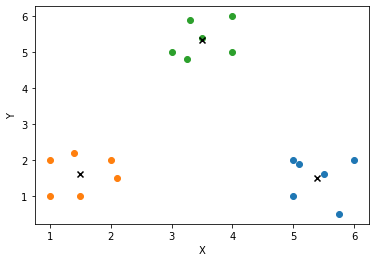

Finished after 3 iterations!


In [10]:
# own KMeans:

solver = ownK(verbose=True)
solver.find_clusters(3, data)



In [11]:
# k means as per library, get distortions to plot elbow
distortions = []
for k in range(1, data.shape[0]):
    # Building and fitting the model
    meanModel = KMeans(n_clusters=k).fit(data)
    meanModel.fit(data)

    distortions.append(sum(np.min(cdist(data, meanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])

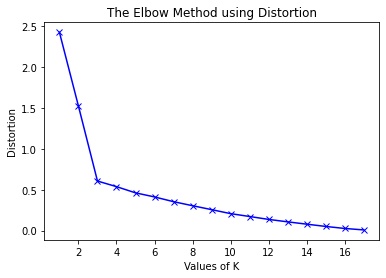

In [12]:
K = range(1, data.shape[0])

# plot distortions

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

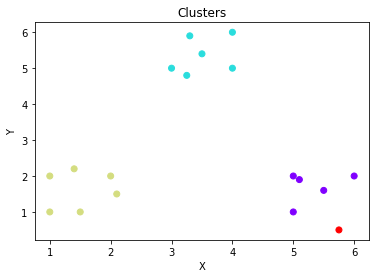

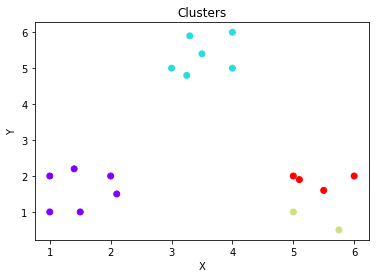

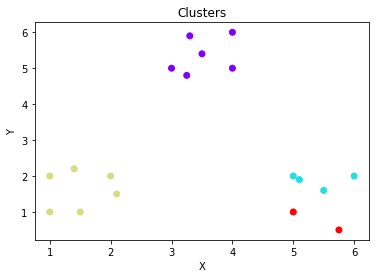

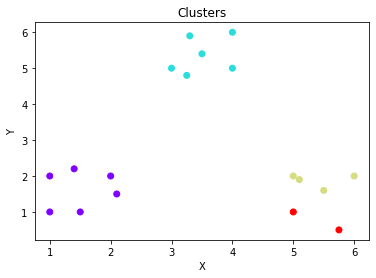

Replacing  [[-0.46074947092222895, 0.06514253666853236]]  and  [[-0.46105726035094435, 0.06463573148860526]]  with  [[-0.46074947092222895, 0.06514253666853236], [-0.46105726035094435, 0.06463573148860526]]  as the distance was  0.000592946728492444
Replacing  [[-0.3041987753909097, 0.33122822707227]]  and  [[-0.3032350992661865, 0.333186571012341]]  with  [[-0.3041987753909097, 0.33122822707227], [-0.3032350992661865, 0.333186571012341]]  as the distance was  0.002182609140678723
Replacing  [[0.30858063878166475, -0.4630000099644311]]  and  [[0.31298621793458836, -0.4706158382727102]]  with  [[0.30858063878166475, -0.4630000099644311], [0.31298621793458836, -0.4706158382727102]]  as the distance was  0.00879829349896107
Replacing  [[0.01858738173819808, 0.5032019459749583]]  and  [[0.02530911703182932, 0.5092019242097927]]  with  [[0.01858738173819808, 0.5032019459749583], [0.02530911703182932, 0.5092019242097927]]  as the distance was  0.009010075703130076
Replacing  [[-0.14728708169

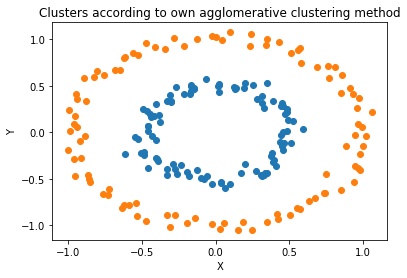

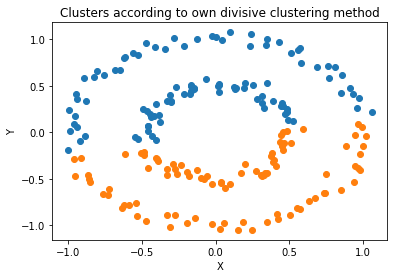

In [13]:
# hierarchical clustering


# Agglomerative with all linkage methods using library

clusters = 4

data_pd = pd.DataFrame(data, columns=['X', 'Y'])
linkages = ['single', 'average', 'complete', 'ward']
for linkage in linkages:
    hc = AgglomerativeClustering(n_clusters = clusters, affinity = 'euclidean', linkage =linkage)
    plt.scatter(data_pd['X'], data_pd['Y'], c = hc.fit_predict(data), cmap ='rainbow')
    plt.title("Clusters")
    plt.ylabel("Y")
    plt.xlabel("X")
    plt.show()

from src.agglomerative import Agglomerative as ownAgglo
from src.divisive import Divisive as ownDiv

# own agglomerative clustering
agglo = ownAgglo(verbose=False)
agglo.find_clusters(noisy_circles[0], 2)
agglo.plot_clusters()

# own divisive clustering
div = ownDiv(verbose=False)
div.find_clusters(noisy_circles[0], 2)
div.plot_clusters()


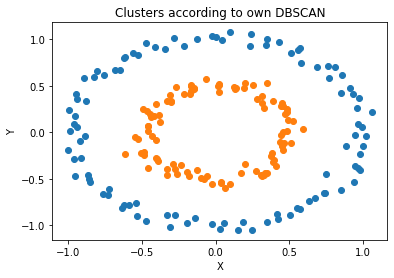

In [14]:
# own DBSCAN

from src.DBSCAN import DBSCAN

scanner = DBSCAN(verbose=False)
scanner.find_clusters(noisy_circles[0], 0.2, 3)
scanner.plot_clusters()